Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Dataset

In [108]:
df = pd.read_csv(r"C:\Users\vansh_10ne3x1\Documents\Feynn Labs\Data.csv")

In [109]:
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,sales,49.00000
1,Australia,Historical,EV stock,Cars,BEV,2011,stock,49.00000
2,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00046
3,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
4,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
...,...,...,...,...,...,...,...,...
7429,World,Projection-STEPS,Oil displacement Mbd,Cars,EV,2030,Milion barrels per day,2.40000
7430,World,Projection-STEPS,Oil displacement Mlge,Buses,EV,2030,Milion litres gasoline equivalent,30000.00000
7431,World,Projection-STEPS,Oil displacement Mlge,Trucks,EV,2030,Milion litres gasoline equivalent,14000.00000
7432,World,Projection-STEPS,Oil displacement Mlge,Vans,EV,2030,Milion litres gasoline equivalent,16000.00000


Classification

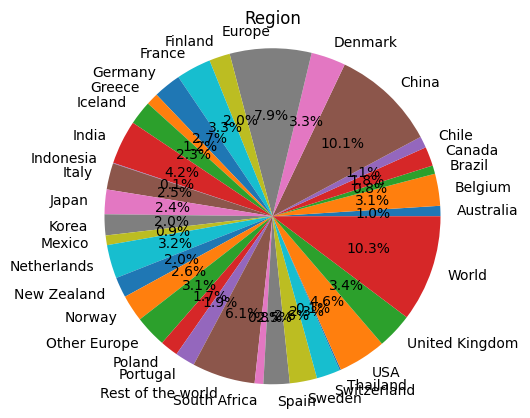

In [100]:
reg = df.groupby('region').size()
reg.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Region')
plt.show()

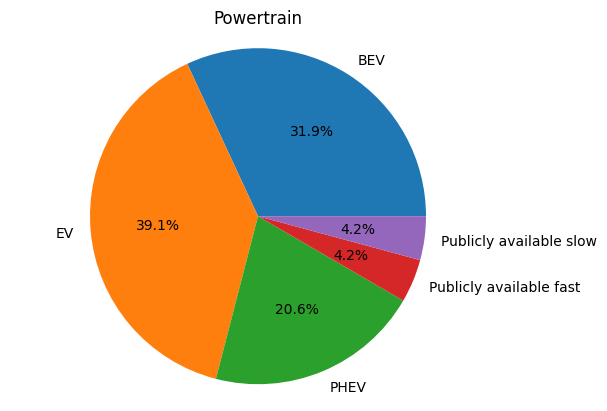

In [101]:
pwr = df.groupby('powertrain').size()
pwr.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Powertrain')
plt.show()

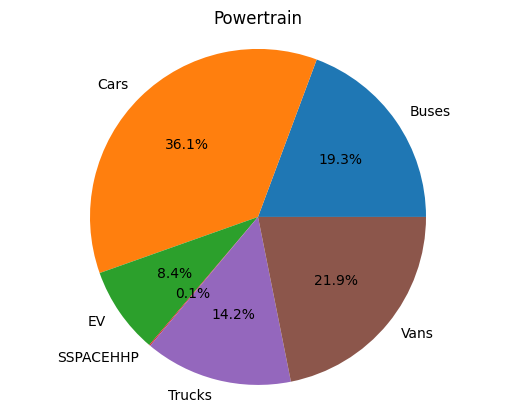

In [102]:
mode = df.groupby('mode').size()
mode.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Powertrain')
plt.show()

<Axes: title={'center': 'Yearwise sales'}, xlabel='parameter', ylabel='count'>

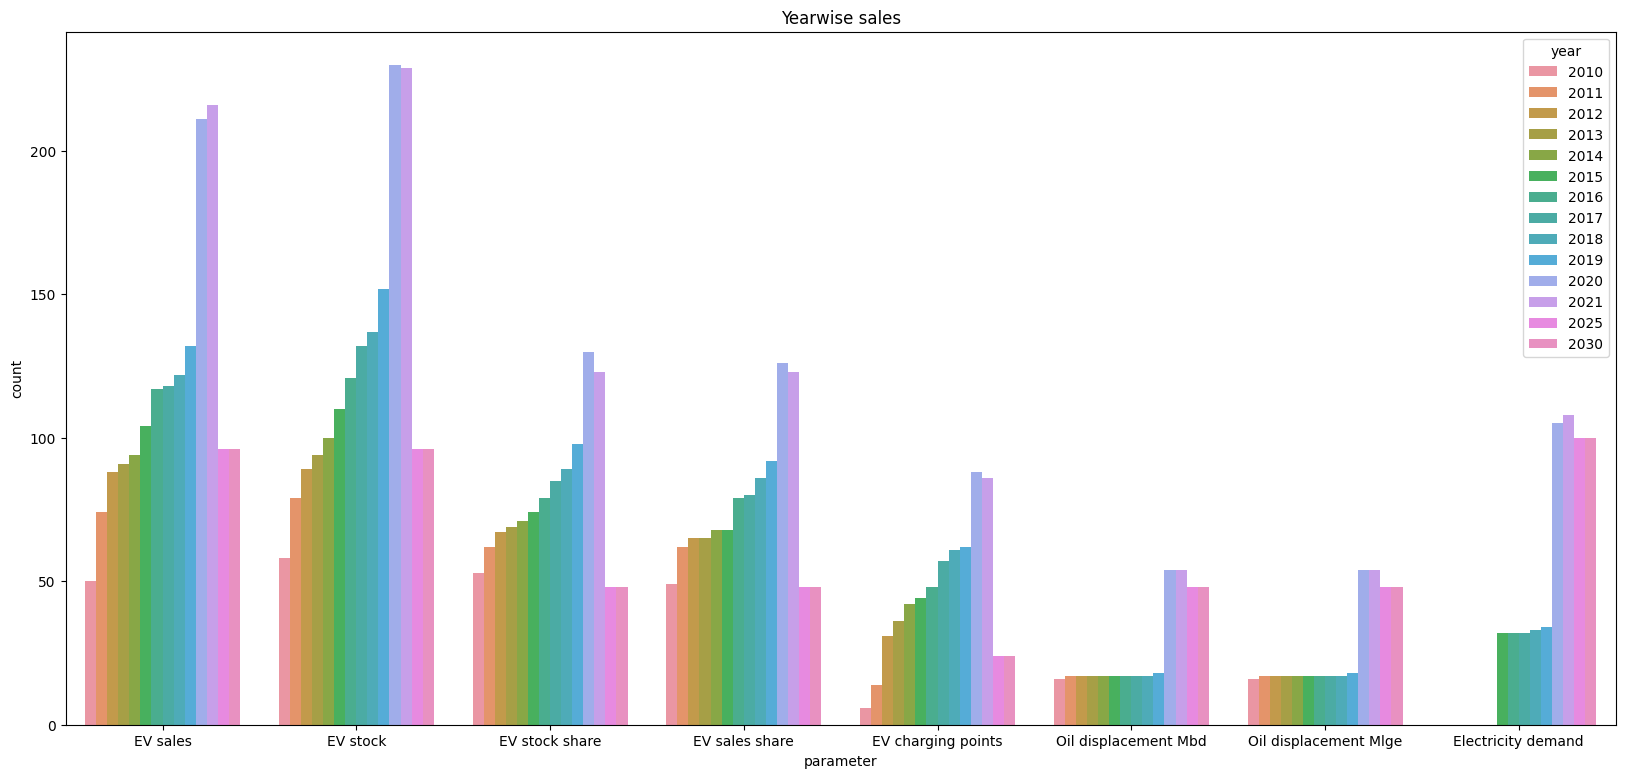

In [103]:
plt.figure(figsize=(20,9))
plt.title('Yearwise sales')
sns.countplot(x="parameter", data=df, hue="year")

<Axes: xlabel='mode', ylabel='count'>

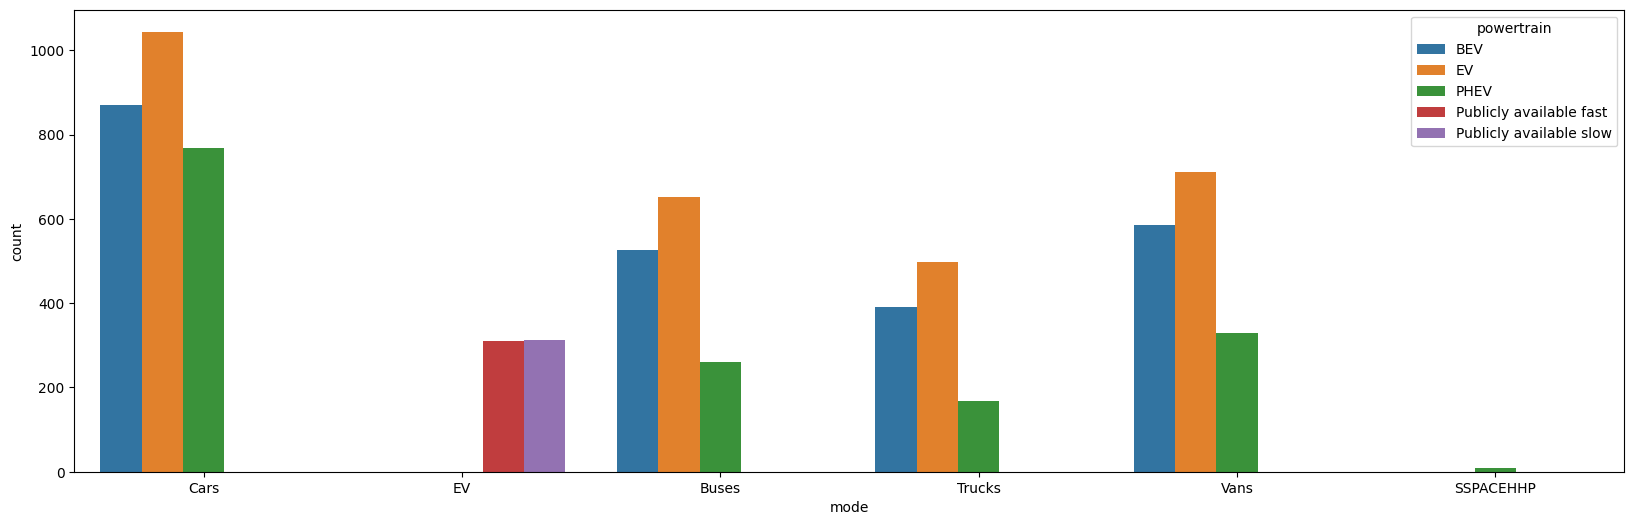

In [32]:
plt.figure(figsize=(20,6))
sns.countplot(x="mode", data=df, hue="powertrain")

In [110]:
df1 = df.drop(columns=['mode', 'year', 'unit'])

In [111]:
df2 = df1[df1['region']=='India']

In [112]:
df2

,region,category,parameter,powertrain,value
3019,India,Historical,EV sales,BEV,450.000000
3020,India,Historical,EV stock,BEV,880.000000
3021,India,Historical,EV sales share,EV,0.021000
3022,India,Historical,EV stock share,EV,0.005200
3023,India,Historical,Oil displacement Mbd,EV,0.000015
...,...,...,...,...,...
3329,India,Projection-APS,Electricity demand,PHEV,430.000000
3330,India,Projection-APS,Electricity demand,BEV,2500.000000
3331,India,Projection-APS,Electricity demand,PHEV,390.000000
3332,India,Projection-APS,Electricity demand,BEV,28000.000000


In [113]:
df3 = pd.get_dummies(df2, columns=['region', 'category', 'parameter', 'powertrain'], drop_first=True)

In [114]:
df3.reset_index(drop=True, inplace=True)
df3


,value,category_Projection-APS,category_Projection-STEPS,parameter_EV sales,parameter_EV sales share,parameter_EV stock,parameter_EV stock share,parameter_Electricity demand,parameter_Oil displacement Mbd,parameter_Oil displacement Mlge,powertrain_EV,powertrain_PHEV,powertrain_Publicly available fast,powertrain_Publicly available slow
0,450.000000,False,False,True,False,False,False,False,False,False,False,False,False,False
1,880.000000,False,False,False,False,True,False,False,False,False,False,False,False,False
2,0.021000,False,False,False,True,False,False,False,False,False,True,False,False,False
3,0.005200,False,False,False,False,False,True,False,False,False,True,False,False,False
4,0.000015,False,False,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,430.000000,True,False,False,False,False,False,True,False,False,False,True,False,False
311,2500.000000,True,False,False,False,False,False,True,False,False,False,False,False,False
312,390.000000,True,False,False,False,False,False,True,False,False,False,True,False,False
313,28000.000000,True,False,False,False,False,False,True,False,False,False,False,False,False


***Clustering***

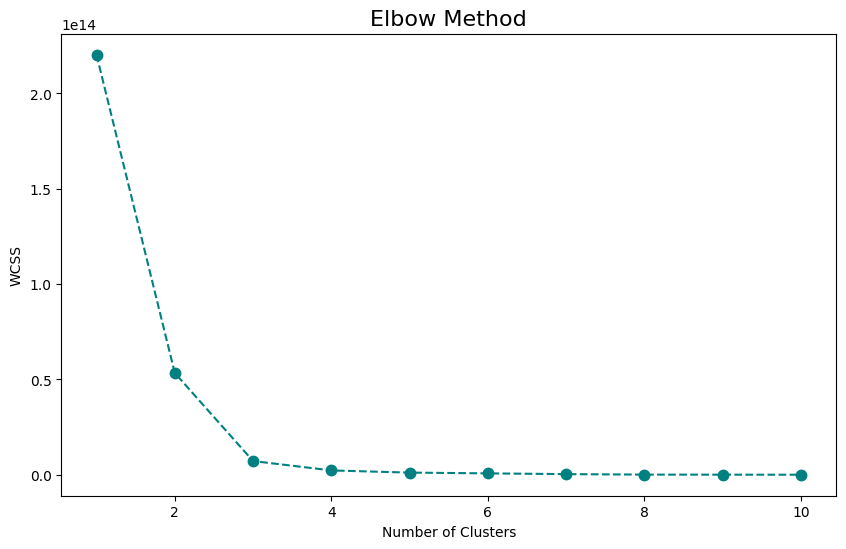

In [115]:
from sklearn.cluster import KMeans

# Determine optimal number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='teal', linestyle='dashed', marker='o',markersize=7.5)

plt.title('Elbow Method', size=16)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
# Perform clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df3)

In [117]:
df1_seg = pd.concat([df3.reset_index(drop=True), pd.DataFrame({'Segment': y_kmeans})], axis=1)

df1_seg_mean = df1_seg.groupby(['Segment'], as_index=False).mean()

In [122]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df3)

In [123]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df1_scaled)

# Add the cluster labels to the original dataframe
df3['Cluster'] = kmeans.labels_

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1_scaled)

df3['PCA1'] = df1_pca[:,0]
df3['PCA2'] = df1_pca[:,1]

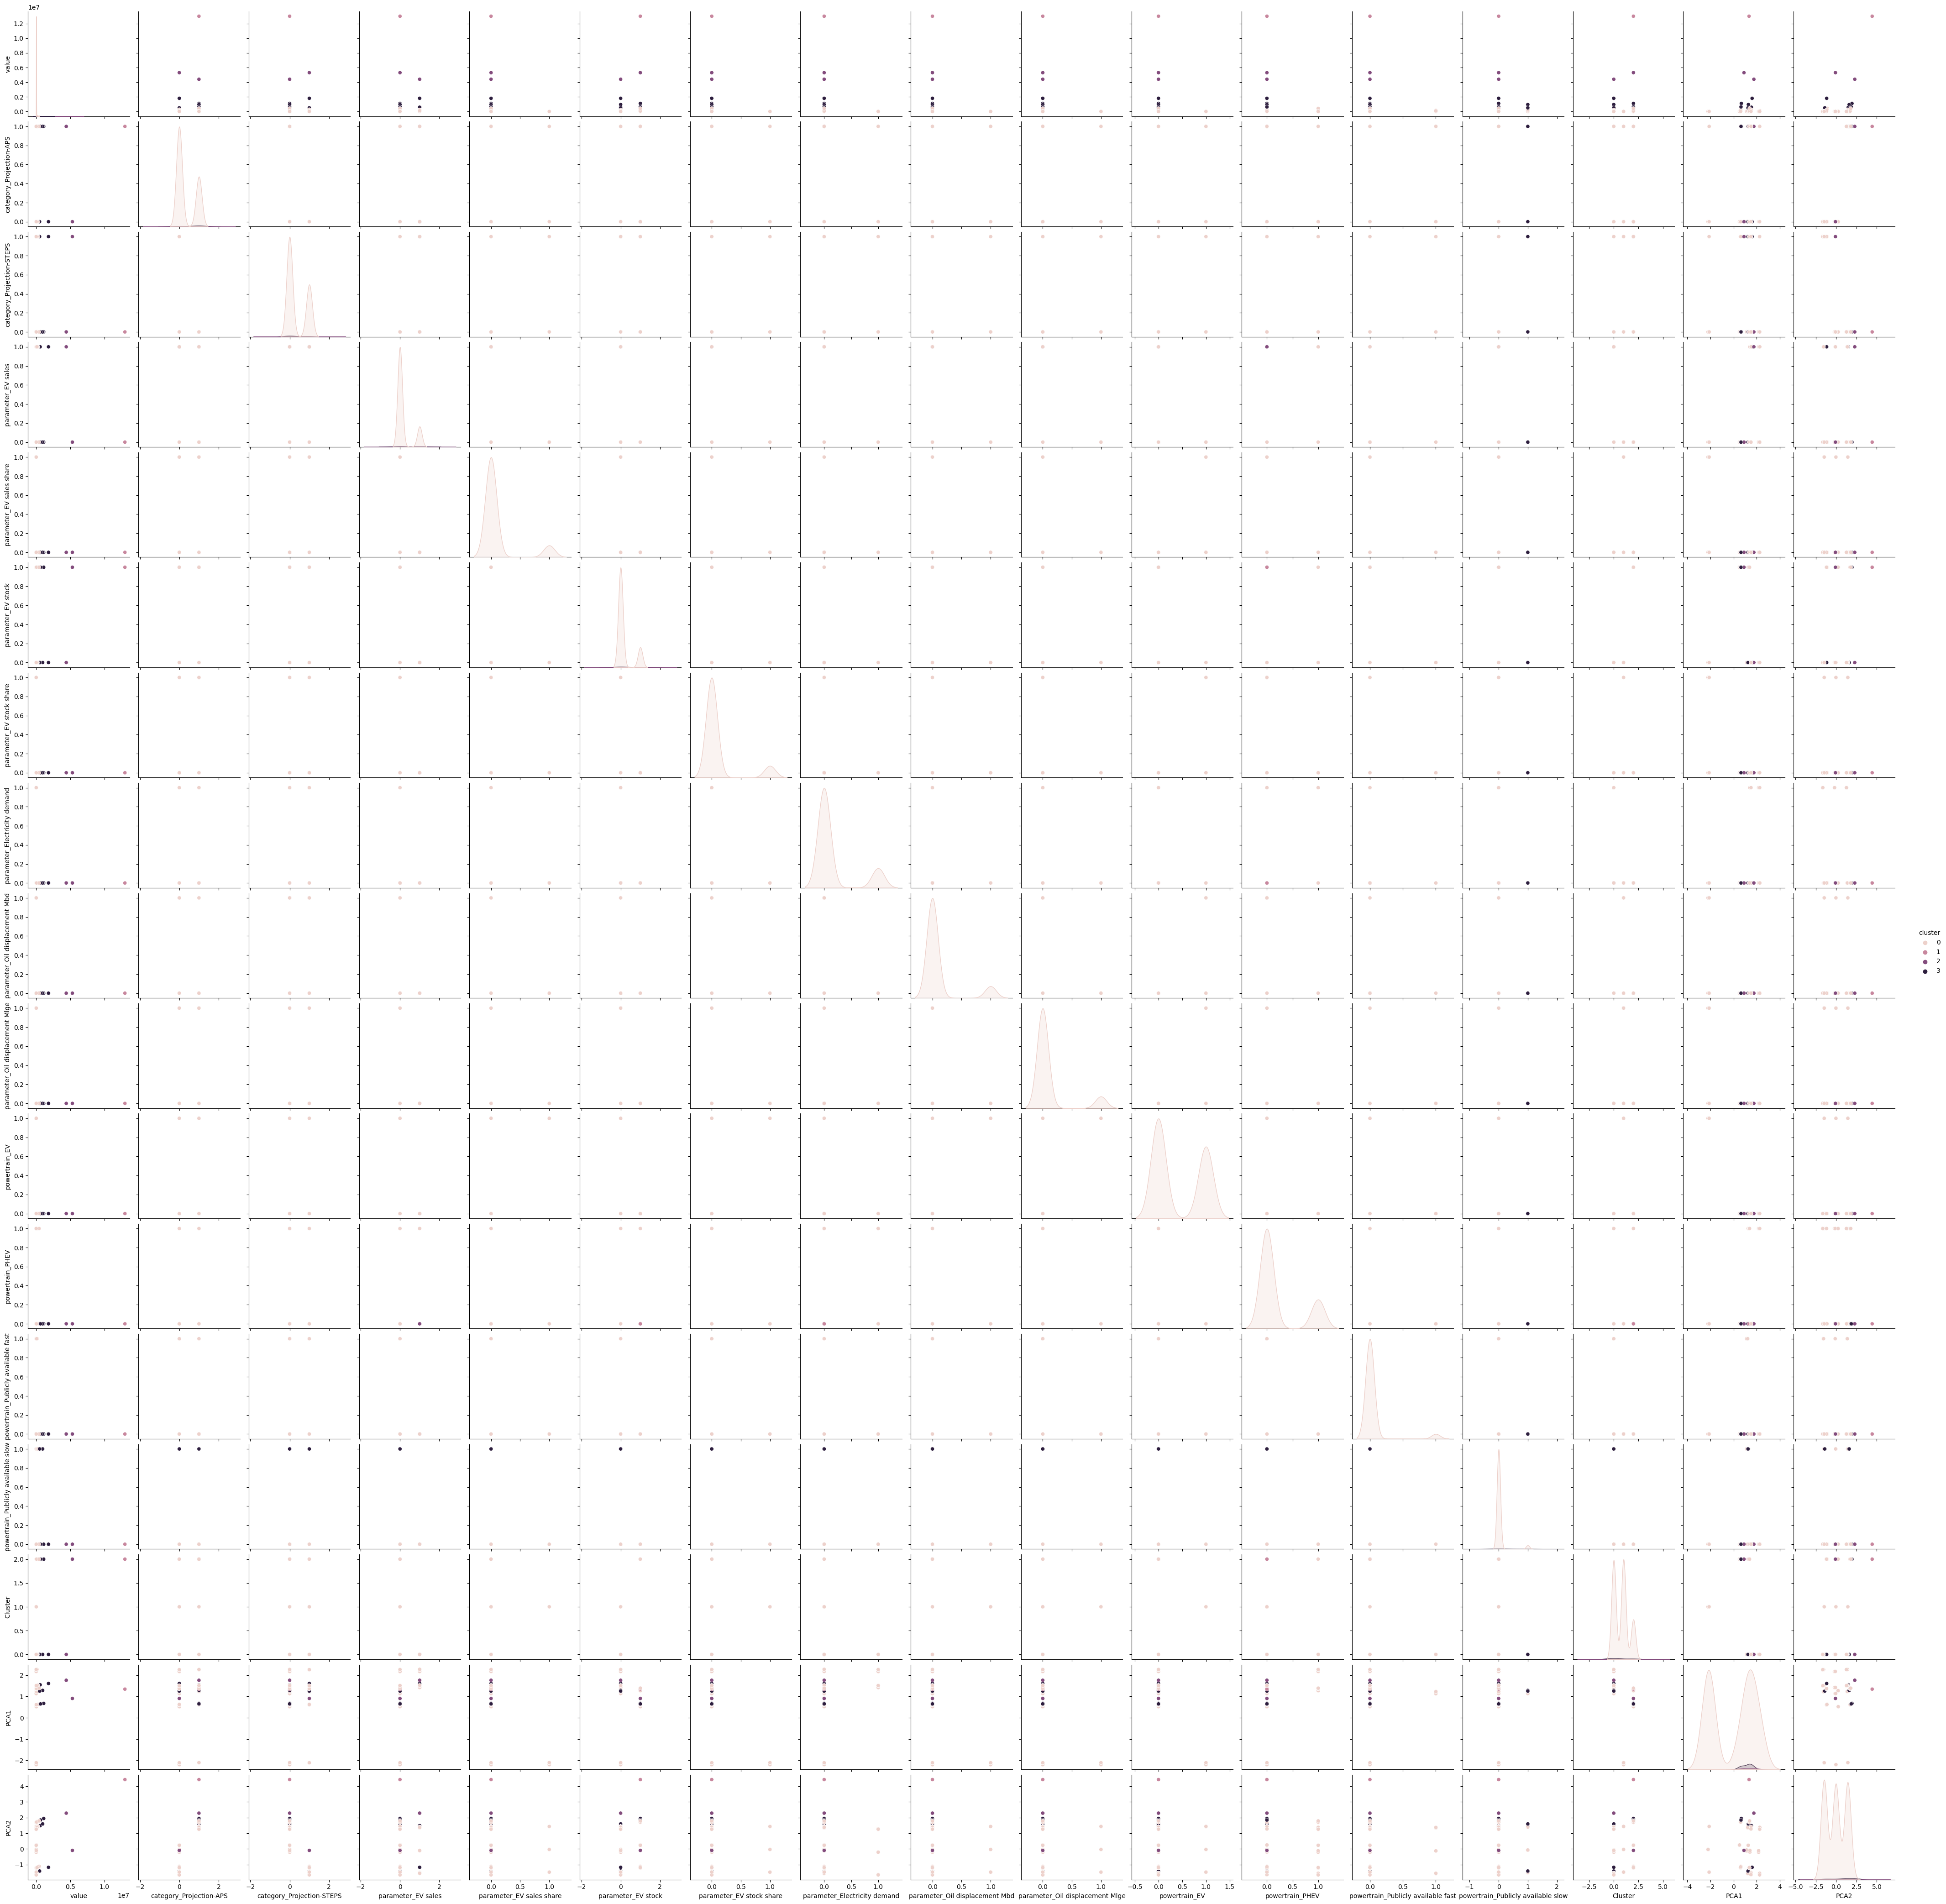

                value  category_Projection-APS  category_Projection-STEPS   
cluster                                                                     
0        1.226643e+04                 0.333333                   0.343137  \
1        1.300000e+07                 1.000000                   0.000000   
2        4.850000e+06                 0.500000                   0.500000   
3        9.266667e+05                 0.666667                   0.333333   

         parameter_EV sales  parameter_EV sales share  parameter_EV stock   
cluster                                                                     
0                  0.169935                  0.104575            0.166667  \
1                  0.000000                  0.000000            1.000000   
2                  0.500000                  0.000000            0.500000   
3                  0.333333                  0.000000            0.333333   

         parameter_EV stock share  parameter_Electricity demand   
cluster

In [124]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df3)

# Add cluster labels to the dataframe
df3['cluster'] = kmeans.labels_
sns.pairplot(df3, hue='cluster')
plt.show()

segment_data = df3.groupby('cluster').mean()
print(segment_data)

In [163]:
dff = df[df["region"]=="India"]
df4 = dff
le = LabelEncoder()
df4["category"] = le.fit_transform(df4["category"])
df4["mode"] = le.fit_transform(df4["mode"])
df4["parameter"] = le.fit_transform(df4["parameter"])
df4["powertrain"] = le.fit_transform(df4["powertrain"])

In [156]:

df4 = df4.drop('region', axis=1)

In [164]:

target_segments = df4.groupby(['category','mode', 'powertrain', 'year']).agg({'value': 'sum'})
target_segments = target_segments.sort_values(by='value', ascending=False)
print(target_segments)

                                      value
category mode powertrain year              
1        1    0          2030  1.742800e+07
2        1    0          2030  7.112000e+06
1        1    0          2025  1.682600e+06
         2    4          2030  9.500000e+05
         4    0          2030  8.425000e+05
...                                     ...
2        3    1          2025  2.009231e+00
1        0    2          2025  1.853000e+00
0        1    1          2012  1.820232e+00
                         2011  1.762930e+00
                         2010  8.862150e-01

[114 rows x 1 columns]


In [165]:
# Define the target segments
target_segments = pd.DataFrame({
    'category': ['Historical', 'Projection-STEPS', 'Projection-APS', 'Historical', 'Projection-APS'],
    'mode': ['Vans', 'Cars', 'EV', 'Trucks', 'Buses'],
    'powertrain': ['PHEV', 'BEV', 'Publicly available slow', 'Publicly available fast', 'EV'],
    'year': [2021, 2025, 2019, 2018, 2030]
})

In [166]:
target_segments

,category,mode,powertrain,year
0,Historical,Vans,PHEV,2021
1,Projection-STEPS,Cars,BEV,2025
2,Projection-APS,EV,Publicly available slow,2019
3,Historical,Trucks,Publicly available fast,2018
4,Projection-APS,Buses,EV,2030
